In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [3]:
dfg = pd.read_csv('wat-good-time-interval-1000.csv')
dfm = pd.read_csv('wat-mal-time-interval-1000.csv')

In [4]:
dfg

,time_intervals,r0,r1,r2,r3,r4,r5,r6,r7,r8,...,inport_north,inport_south,inport_east,inport_west,outport_local,outport_north,outport_south,outport_east,outport_west,target
0,1000,65,20,6,4,46,27,22,19,21,...,69,100,14,20,65,14,20,70,100,1
1,2000,68,24,10,7,43,12,8,0,21,...,76,65,15,16,67,16,16,75,65,1
2,3000,47,10,9,1,31,1,2,2,31,...,65,65,13,10,48,12,10,65,65,1
3,4000,54,6,2,2,48,9,5,7,43,...,115,50,23,10,54,23,10,115,50,1
4,5000,60,12,3,1,36,13,12,6,26,...,65,55,13,11,60,13,11,65,55,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3147,3148000,84,36,30,30,48,18,6,18,26,...,66,60,52,78,86,50,78,66,60,1
3148,3149000,84,36,30,24,48,6,6,6,24,...,48,60,60,54,84,60,54,48,60,1
3149,3150000,81,39,30,18,42,26,24,24,24,...,78,96,70,87,80,71,87,78,96,1
3150,3151000,69,15,6,6,42,16,6,12,36,...,66,30,62,27,70,61,27,66,30,1


In [5]:
dfm

,time_intervals,r0,r1,r2,r3,r4,r5,r6,r7,r8,...,inport_north,inport_south,inport_east,inport_west,outport_local,outport_north,outport_south,outport_east,outport_west,target
0,1000,66,86,22,12,47,70,29,26,27,...,164,146,33,34,131,33,34,165,146,0
1,2000,77,91,15,10,51,61,10,4,28,...,172,109,37,44,134,38,44,176,109,0
2,3000,53,69,14,4,31,35,4,4,31,...,154,106,28,23,107,27,23,149,106,0
3,4000,62,55,9,2,50,43,6,7,45,...,190,63,40,22,103,40,22,190,63,0
4,5000,69,66,7,3,49,54,29,18,32,...,132,88,27,42,114,27,42,136,89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3146,3147000,85,42,36,36,42,18,6,18,18,...,49,78,48,78,85,48,78,48,78,0
3147,3148000,87,33,26,20,54,6,6,7,30,...,60,54,61,61,85,62,62,60,54,0
3148,3149000,76,39,28,16,37,30,24,23,19,...,68,85,77,83,78,76,82,68,85,0
3149,3150000,77,24,18,18,41,12,6,12,35,...,64,47,54,42,77,54,42,64,47,0


In [6]:
df = dfg.append(dfm, ignore_index=True)
df = df.sort_values('time_intervals')

In [7]:
df.to_csv('wat-time-pca-1000.csv',index=False)
df = pd.read_csv("wat-time-pca-1000.csv")
df

,time_intervals,r0,r1,r2,r3,r4,r5,r6,r7,r8,...,inport_north,inport_south,inport_east,inport_west,outport_local,outport_north,outport_south,outport_east,outport_west,target
0,1000,65,20,6,4,46,27,22,19,21,...,69,100,14,20,65,14,20,70,100,1
1,1000,66,86,22,12,47,70,29,26,27,...,164,146,33,34,131,33,34,165,146,0
2,2000,77,91,15,10,51,61,10,4,28,...,172,109,37,44,134,38,44,176,109,0
3,2000,68,24,10,7,43,12,8,0,21,...,76,65,15,16,67,16,16,75,65,1
4,3000,47,10,9,1,31,1,2,2,31,...,65,65,13,10,48,12,10,65,65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6298,3150000,77,24,18,18,41,12,6,12,35,...,64,47,54,42,77,54,42,64,47,0
6299,3150000,81,39,30,18,42,26,24,24,24,...,78,96,70,87,80,71,87,78,96,1
6300,3151000,73,36,30,18,36,12,18,6,30,...,66,66,66,66,72,66,67,66,66,0
6301,3151000,69,15,6,6,42,16,6,12,36,...,66,30,62,27,70,61,27,66,30,1


In [8]:
df.corr()

,time_intervals,r0,r1,r2,r3,r4,r5,r6,r7,r8,...,inport_north,inport_south,inport_east,inport_west,outport_local,outport_north,outport_south,outport_east,outport_west,target
time_intervals,1.000000,0.110224,-0.019140,0.018825,0.010450,0.129934,0.007815,0.055179,0.084233,0.141078,...,0.078012,0.031100,0.142564,0.076559,0.063065,0.142849,0.076888,0.078017,0.031097,0.000275
r0,0.110224,1.000000,0.852018,0.813404,0.646446,0.888406,0.654695,0.679588,0.584164,0.782763,...,0.833455,0.898754,0.847267,0.904626,0.974841,0.847766,0.905310,0.833451,0.898482,-0.004230
r1,-0.019140,0.852018,1.000000,0.873634,0.723998,0.644690,0.685840,0.564432,0.521348,0.542039,...,0.699022,0.899875,0.664602,0.886241,0.912469,0.665922,0.886324,0.699477,0.900332,-0.044867
r2,0.018825,0.813404,0.873634,1.000000,0.811143,0.612568,0.491640,0.586711,0.511068,0.514305,...,0.607399,0.895105,0.620687,0.915244,0.826627,0.621955,0.914432,0.608194,0.896239,-0.015658
r3,0.010450,0.646446,0.723998,0.811143,1.000000,0.471697,0.432813,0.337859,0.615132,0.401173,...,0.488633,0.811946,0.505624,0.833711,0.655636,0.506490,0.832323,0.489444,0.813263,-0.012170
r4,0.129934,0.888406,0.644690,0.612568,0.471697,1.000000,0.693032,0.717216,0.581269,0.897094,...,0.911157,0.767514,0.905884,0.742168,0.882161,0.905030,0.742644,0.911574,0.766928,-0.005857
r5,0.007815,0.654695,0.685840,0.491640,0.432813,0.693032,1.000000,0.664308,0.587628,0.493682,...,0.696336,0.674658,0.636526,0.625827,0.731828,0.637258,0.626732,0.697044,0.674018,-0.047133
r6,0.055179,0.679588,0.564432,0.586711,0.337859,0.717216,0.664308,1.000000,0.537563,0.535934,...,0.647876,0.661874,0.652828,0.651426,0.696638,0.653703,0.651143,0.649618,0.662081,-0.013411
r7,0.084233,0.584164,0.521348,0.511068,0.615132,0.581269,0.587628,0.537563,1.000000,0.500584,...,0.594903,0.708258,0.618613,0.720103,0.589834,0.619207,0.719625,0.596362,0.708822,-0.008642
r8,0.141078,0.782763,0.542039,0.514305,0.401173,0.897094,0.493682,0.535934,0.500584,1.000000,...,0.918076,0.677867,0.918603,0.657652,0.770611,0.917298,0.657882,0.918667,0.677773,-0.000724


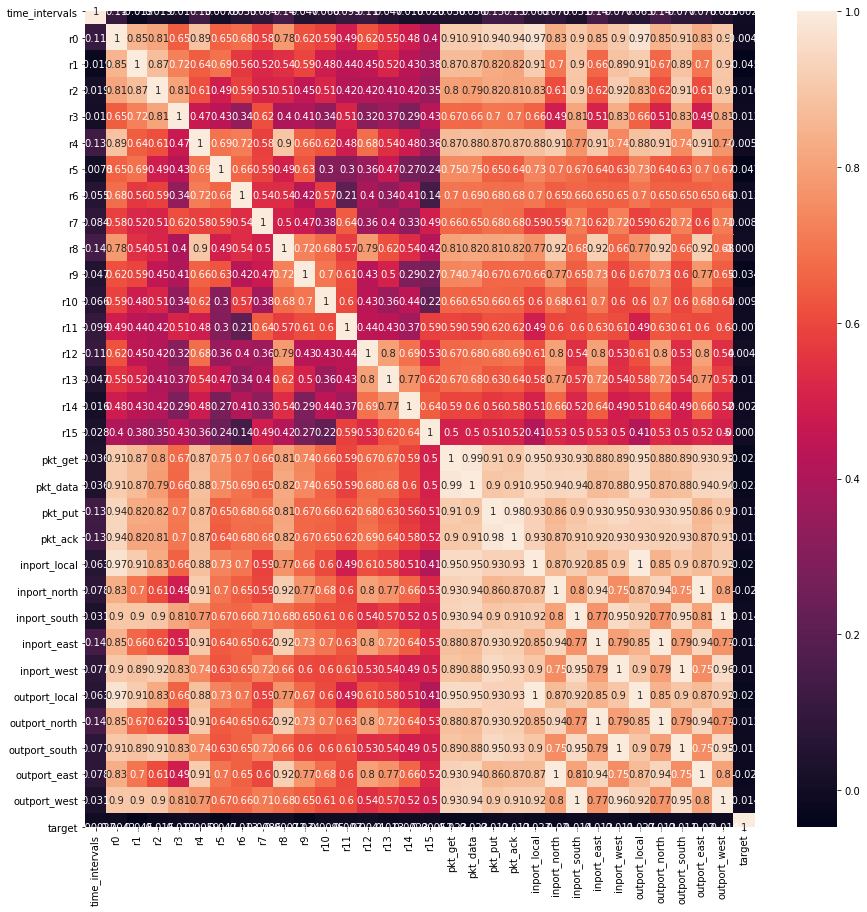

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [48]:
train_X = df.drop(columns=['target','time_intervals'])
train_X

,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,...,inport_local,inport_north,inport_south,inport_east,inport_west,outport_local,outport_north,outport_south,outport_east,outport_west
0,65,20,6,4,46,27,22,19,21,11,...,66,69,100,14,20,65,14,20,70,100
1,66,86,22,12,47,70,29,26,27,43,...,132,164,146,33,34,131,33,34,165,146
2,77,91,15,10,51,61,10,4,28,46,...,139,172,109,37,44,134,38,44,176,109
3,68,24,10,7,43,12,8,0,21,6,...,67,76,65,15,16,67,16,16,75,65
4,47,10,9,1,31,1,2,2,31,26,...,47,65,65,13,10,48,12,10,65,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6298,77,24,18,18,41,12,6,12,35,11,...,77,64,47,54,42,77,54,42,64,47
6299,81,39,30,18,42,26,24,24,24,14,...,81,78,96,70,87,80,71,87,78,96
6300,73,36,30,18,36,12,18,6,30,18,...,73,66,66,66,66,72,66,67,66,66
6301,69,15,6,6,42,16,6,12,36,16,...,69,66,30,62,27,70,61,27,66,30


In [11]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.570175,0.147059,0.075949,0.071429,0.582278,0.3375,0.44,0.240506,0.287671,0.183333,...,0.379310,0.359375,0.581395,0.101449,0.153846,0.373563,0.102190,0.155039,0.364583,0.564972
1,0.578947,0.632353,0.278481,0.214286,0.594937,0.8750,0.58,0.329114,0.369863,0.716667,...,0.758621,0.854167,0.848837,0.239130,0.261538,0.752874,0.240876,0.263566,0.859375,0.824859
2,0.675439,0.669118,0.189873,0.178571,0.645570,0.7625,0.20,0.050633,0.383562,0.766667,...,0.798851,0.895833,0.633721,0.268116,0.338462,0.770115,0.277372,0.341085,0.916667,0.615819
3,0.596491,0.176471,0.126582,0.125000,0.544304,0.1500,0.16,0.000000,0.287671,0.100000,...,0.385057,0.395833,0.377907,0.108696,0.123077,0.385057,0.116788,0.124031,0.390625,0.367232
4,0.412281,0.073529,0.113924,0.017857,0.392405,0.0125,0.04,0.025316,0.424658,0.433333,...,0.270115,0.338542,0.377907,0.094203,0.076923,0.275862,0.087591,0.077519,0.338542,0.367232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6298,0.675439,0.176471,0.227848,0.321429,0.518987,0.1500,0.12,0.151899,0.479452,0.183333,...,0.442529,0.333333,0.273256,0.391304,0.323077,0.442529,0.394161,0.325581,0.333333,0.265537
6299,0.710526,0.286765,0.379747,0.321429,0.531646,0.3250,0.48,0.303797,0.328767,0.233333,...,0.465517,0.406250,0.558140,0.507246,0.669231,0.459770,0.518248,0.674419,0.406250,0.542373
6300,0.640351,0.264706,0.379747,0.321429,0.455696,0.1500,0.36,0.075949,0.410959,0.300000,...,0.419540,0.343750,0.383721,0.478261,0.507692,0.413793,0.481752,0.519380,0.343750,0.372881
6301,0.605263,0.110294,0.075949,0.107143,0.531646,0.2000,0.12,0.151899,0.493151,0.266667,...,0.396552,0.343750,0.174419,0.449275,0.207692,0.402299,0.445255,0.209302,0.343750,0.169492


In [12]:
pca = PCA(0.95)
pca.fit(train_X)
principal_components = pca.transform(train_X)
principal_components

array([[ 0.94261752, -0.06666855, -0.37581774, ...,  0.56530793,
         0.08506601, -0.10163593],
       [ 2.05224876, -0.17555756, -0.34444473, ...,  1.68718973,
         0.1121138 ,  0.19416349],
       [ 2.08998244, -0.41822374, -0.21720572, ...,  1.43574222,
        -0.28602583,  0.41952923],
       ...,
       [ 1.57445275, -0.07656958, -0.02772614, ..., -0.11645627,
         0.04008133,  0.11844198],
       [ 1.05244672, -0.46682122, -0.2883311 , ..., -0.01905141,
        -0.23167199, -0.1614616 ],
       [ 1.75096619, -0.04801765, -0.03850375, ..., -0.18789788,
         0.14088334,  0.17062293]])

In [13]:
pca.explained_variance_ratio_

array([0.77261154, 0.06996867, 0.04216562, 0.02650166, 0.0178188 ,
       0.01504141, 0.01343509])

Text(0, 0.5, 'Variance')

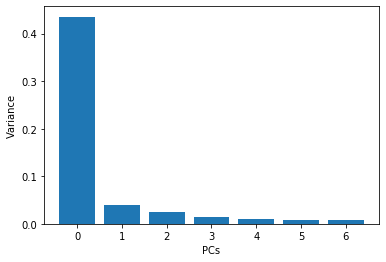

In [14]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [15]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6
0,0.942618,-0.066669,-0.375818,0.106960,0.565308,0.085066,-0.101636
1,2.052249,-0.175558,-0.344445,-0.049004,1.687190,0.112114,0.194163
2,2.089982,-0.418224,-0.217206,0.056624,1.435742,-0.286026,0.419529
3,0.817107,-0.201799,-0.331328,-0.180024,0.352540,-0.205537,0.121577
4,0.600815,-0.271339,-0.090478,0.435192,0.298717,-0.255840,0.271736
...,...,...,...,...,...,...,...
6298,1.224920,-0.180400,-0.214207,-0.152257,-0.074600,-0.251868,-0.113479
6299,1.976847,0.023292,0.206936,0.128836,0.025341,0.340188,-0.119228
6300,1.574453,-0.076570,-0.027726,0.171788,-0.116456,0.040081,0.118442
6301,1.052447,-0.466821,-0.288331,-0.087594,-0.019051,-0.231672,-0.161462


In [16]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df

,0,1,2,3,4,5,6,target
0,0.942618,-0.066669,-0.375818,0.106960,0.565308,0.085066,-0.101636,1
1,2.052249,-0.175558,-0.344445,-0.049004,1.687190,0.112114,0.194163,0
2,2.089982,-0.418224,-0.217206,0.056624,1.435742,-0.286026,0.419529,0
3,0.817107,-0.201799,-0.331328,-0.180024,0.352540,-0.205537,0.121577,1
4,0.600815,-0.271339,-0.090478,0.435192,0.298717,-0.255840,0.271736,1
...,...,...,...,...,...,...,...,...
6298,1.224920,-0.180400,-0.214207,-0.152257,-0.074600,-0.251868,-0.113479,0
6299,1.976847,0.023292,0.206936,0.128836,0.025341,0.340188,-0.119228,1
6300,1.574453,-0.076570,-0.027726,0.171788,-0.116456,0.040081,0.118442,0
6301,1.052447,-0.466821,-0.288331,-0.087594,-0.019051,-0.231672,-0.161462,1


In [17]:
final_df.corr()

,0,1,2,3,4,5,6,target
0,1.000000e+00,-1.790771e-14,-3.140170e-16,-3.272241e-16,3.945501e-15,8.780431e-16,-4.939455e-15,-0.015962
1,-1.790771e-14,1.000000e+00,3.781099e-16,5.782845e-16,-6.294147e-16,2.399684e-17,-3.565873e-16,-0.009187
2,-3.140170e-16,3.781099e-16,1.000000e+00,-4.285679e-15,-9.463218e-15,-1.260247e-15,8.027194e-16,0.009329
3,-3.272241e-16,5.782845e-16,-4.285679e-15,1.000000e+00,3.766410e-16,8.080485e-16,7.571860e-16,-0.007730
4,3.945501e-15,-6.294147e-16,-9.463218e-15,3.766410e-16,1.000000e+00,5.086503e-16,-2.554429e-15,-0.060445
5,8.780431e-16,2.399684e-17,-1.260247e-15,8.080485e-16,5.086503e-16,1.000000e+00,8.991471e-17,0.002925
6,-4.939455e-15,-3.565873e-16,8.027194e-16,7.571860e-16,-2.554429e-15,8.991471e-17,1.000000e+00,-0.012381
target,-1.596177e-02,-9.186574e-03,9.328500e-03,-7.730268e-03,-6.044488e-02,2.925331e-03,-1.238108e-02,1.000000


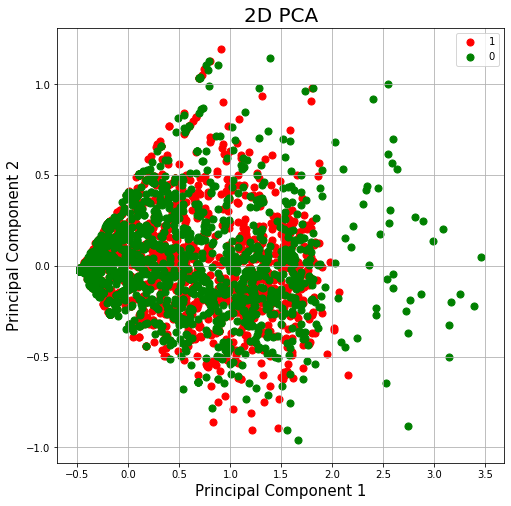

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 0]
               , final_df.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [19]:
train_Y = df['target']

In [20]:
train_Y.value_counts()

1    3152
0    3151
Name: target, dtype: int64

#### machine learning models

In [21]:
X_train, X_test, y_train, y_test = train_test_split(principal_df, train_Y, test_size=0.3, random_state=0, shuffle = True)

In [22]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [23]:
logit_model=sm.Logit(train_Y,train_X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.681668
         Iterations: 35
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.017     
Dependent Variable:   target            AIC:               8647.1040 
Date:                 2020-05-02 13:27  BIC:               8829.3211 
No. Observations:     6303              Log-Likelihood:    -4296.6   
Df Model:             26                LL-Null:           -4368.9   
Df Residuals:         6276              LLR p-value:       1.9383e-18
Converged:            0.0000            Scale:             1.0000    
No. Iterations:       35.0000                                        
---------------------------------------------------------------------
    Coef.      Std.Err.      z    P>|z|      [0.025         0.975]   
---------------------------------------------------------------------
0   88.5888  6041530.1963  0.0000 1.0000 -11841093.0075 11841270.1851
1  -23.6503  7102158.6352 -0.0000 1.0000 -13919998.7

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [24]:
logreg = LogisticRegression(C=1,penalty='l2',random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred = logreg.predict(X_test)
print('Accuracy {:.2f}'.format(accuracy_score(y_test,y_pred)))
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Accuracy 0.49
Train Prediction Score 50.249320036264734
Test Prediction  49.1274457958752


In [26]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[672 271]
 [691 257]]


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.71      0.58       943
           1       0.49      0.27      0.35       948

    accuracy                           0.49      1891
   macro avg       0.49      0.49      0.47      1891
weighted avg       0.49      0.49      0.47      1891



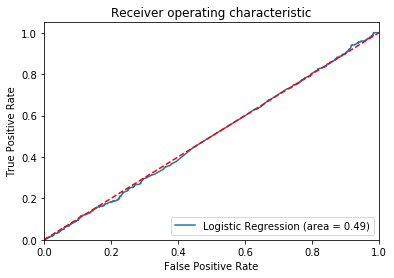

In [28]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [29]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [30]:
y_pred_knn= knn.predict(X_test)

In [31]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 58.68087035358114
Test Prediction  48.863035430988894


In [32]:
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

[[602 341]
 [626 322]]


In [33]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.49      0.64      0.55       943
           1       0.49      0.34      0.40       948

    accuracy                           0.49      1891
   macro avg       0.49      0.49      0.48      1891
weighted avg       0.49      0.49      0.48      1891



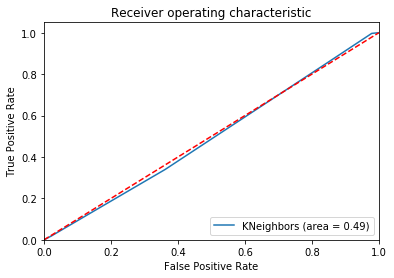

In [34]:
logit_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [35]:
#supportvectormachines
from sklearn.svm import SVC

In [ ]:
ksvc = SVC(kernel = 'rbf',random_state = 42,probability=True)
ksvc.fit(X_train,y_train)

In [ ]:
y_pred_ksvc= ksvc.predict(X_test)

In [ ]:
ksvc_score_train = ksvc.score(X_train,y_train)
print("Train Prediction Score",ksvc_score_train*100)
ksvc_score_test = accuracy_score(y_test,y_pred_ksvc)
print("Test Prediction Score",ksvc_score_test*100)

In [ ]:
cm = confusion_matrix(y_test, y_pred_ksvc)
print(cm)

In [ ]:
print(classification_report(y_test,y_pred_ksvc))

In [36]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [37]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
y_pred_nb= nb.predict(X_test)

In [39]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 49.68268359020852
Test Prediction Score 51.93019566367002


In [40]:
cm = confusion_matrix(y_test, y_pred_nb)
print(cm)

[[168 775]
 [134 814]]


In [41]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.56      0.18      0.27       943
           1       0.51      0.86      0.64       948

    accuracy                           0.52      1891
   macro avg       0.53      0.52      0.46      1891
weighted avg       0.53      0.52      0.46      1891



In [42]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [43]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=10, validation_split=0.4 )

Train on 2647 samples, validate on 1765 samples
Epoch 1/10
2647/2647 [==============================] - 1s 380us/step - loss: 0.6940 - accuracy: 0.5104 - val_loss: 0.6949 - val_accuracy: 0.4986
Epoch 2/10
2647/2647 [==============================] - 0s 111us/step - loss: 0.6932 - accuracy: 0.5153 - val_loss: 0.6942 - val_accuracy: 0.5014
Epoch 3/10
2647/2647 [==============================] - 0s 105us/step - loss: 0.6927 - accuracy: 0.5198 - val_loss: 0.6938 - val_accuracy: 0.5025
Epoch 4/10
2647/2647 [==============================] - 0s 100us/step - loss: 0.6925 - accuracy: 0.5176 - val_loss: 0.6936 - val_accuracy: 0.5042
Epoch 5/10
2647/2647 [==============================] - 0s 115us/step - loss: 0.6924 - accuracy: 0.5202 - val_loss: 0.6935 - val_accuracy: 0.5082
Epoch 6/10
2647/2647 [==============================] - 0s 76us/step - loss: 0.6923 - accuracy: 0.5229 - val_loss: 0.6933 - val_accuracy: 0.5110
Epoch 7/10
2647/2647 [==============================] - 0s 110us/step - loss:

In [44]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(4, activation='relu', input_shape=(n_cols,)))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=20, validation_split=0.4 )

Train on 2647 samples, validate on 1765 samples
Epoch 1/20
2647/2647 [==============================] - 1s 261us/step - loss: 0.2500 - accuracy: 0.5025 - val_loss: 0.2500 - val_accuracy: 0.4952
Epoch 2/20
2647/2647 [==============================] - 0s 80us/step - loss: 0.2500 - accuracy: 0.5009 - val_loss: 0.2500 - val_accuracy: 0.4929
Epoch 3/20
2647/2647 [==============================] - 0s 85us/step - loss: 0.2500 - accuracy: 0.5009 - val_loss: 0.2500 - val_accuracy: 0.4890
Epoch 4/20
2647/2647 [==============================] - 0s 65us/step - loss: 0.2500 - accuracy: 0.5036 - val_loss: 0.2500 - val_accuracy: 0.4890
Epoch 5/20
2647/2647 [==============================] - 0s 71us/step - loss: 0.2500 - accuracy: 0.4991 - val_loss: 0.2500 - val_accuracy: 0.4884
Epoch 6/20
2647/2647 [==============================] - 0s 87us/step - loss: 0.2500 - accuracy: 0.5066 - val_loss: 0.2500 - val_accuracy: 0.4935
Epoch 7/20
2647/2647 [==============================] - 0s 101us/step - loss: 0.2

In [45]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=20, validation_split=0.4 )

Train on 2647 samples, validate on 1765 samples
Epoch 1/20
2647/2647 [==============================] - 1s 314us/step - loss: 0.2526 - accuracy: 0.4975 - val_loss: 0.2511 - val_accuracy: 0.5105
Epoch 2/20
2647/2647 [==============================] - 0s 99us/step - loss: 0.2521 - accuracy: 0.4904 - val_loss: 0.2508 - val_accuracy: 0.5150
Epoch 3/20
2647/2647 [==============================] - 0s 102us/step - loss: 0.2518 - accuracy: 0.4885 - val_loss: 0.2506 - val_accuracy: 0.5184
Epoch 4/20
2647/2647 [==============================] - 0s 98us/step - loss: 0.2516 - accuracy: 0.4926 - val_loss: 0.2505 - val_accuracy: 0.5144
Epoch 5/20
2647/2647 [==============================] - 0s 97us/step - loss: 0.2514 - accuracy: 0.4923 - val_loss: 0.2505 - val_accuracy: 0.5105
Epoch 6/20
2647/2647 [==============================] - 0s 107us/step - loss: 0.2513 - accuracy: 0.4938 - val_loss: 0.2504 - val_accuracy: 0.5059
Epoch 7/20
2647/2647 [==============================] - 0s 103us/step - loss: 0

In [46]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(16, activation='relu', input_shape=(n_cols,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=20, validation_split=0.4 )

Train on 2647 samples, validate on 1765 samples
Epoch 1/20
2647/2647 [==============================] - 1s 328us/step - loss: 0.2525 - accuracy: 0.4979 - val_loss: 0.2511 - val_accuracy: 0.5088
Epoch 2/20
2647/2647 [==============================] - 0s 80us/step - loss: 0.2516 - accuracy: 0.4904 - val_loss: 0.2507 - val_accuracy: 0.4997
Epoch 3/20
2647/2647 [==============================] - 0s 94us/step - loss: 0.2511 - accuracy: 0.4873 - val_loss: 0.2504 - val_accuracy: 0.5025
Epoch 4/20
2647/2647 [==============================] - 0s 101us/step - loss: 0.2508 - accuracy: 0.4892 - val_loss: 0.2503 - val_accuracy: 0.5059
Epoch 5/20
2647/2647 [==============================] - 0s 99us/step - loss: 0.2506 - accuracy: 0.4930 - val_loss: 0.2502 - val_accuracy: 0.5088
Epoch 6/20
2647/2647 [==============================] - 0s 74us/step - loss: 0.2505 - accuracy: 0.4964 - val_loss: 0.2502 - val_accuracy: 0.5093
Epoch 7/20
2647/2647 [==============================] - 0s 88us/step - loss: 0.2

In [47]:
principal_df[principal_df.duplicated()].shape

(4120, 7)